# **CS 470 Assignment 2** 

#2. Convolutional Neural Networks (CNN) using PyTorch 

#### In this assignment, you will develop a neural network with convolution and pooling layers to perform image classification, and test it out on the [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset. 


In [27]:
#Importing all libraries
import os
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import PIL
from PIL import Image
from torchvision import datasets

## Download the data

Without data augmentation

In [28]:

train_transform = transforms.Compose(
    [#transforms.RandomHorizontalFlip(p=0.5),
     #transforms.RandomAffine(degrees=(-5, 5), translate=(0.1, 0.1), scale=(0.9, 1.1), resample=PIL.Image.BILINEAR), ##DATA AUGMENTATION 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
train_set, val_set = torch.utils.data.random_split(dataset, [40000, 10000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False, num_workers=8)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False, num_workers=8)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


## Visualize 10 different classes of images in the training dataset

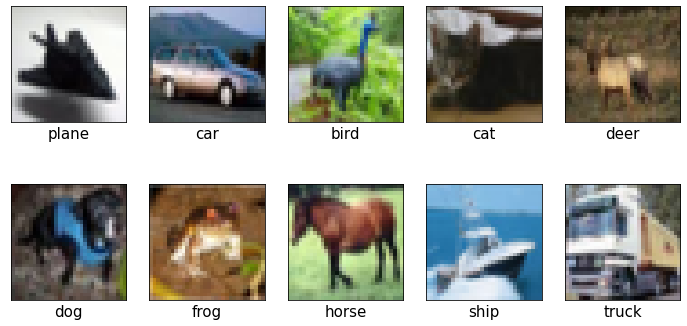

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# visualize training image for each class
sample_images = [dataset.data[np.asarray(dataset.targets) == label][0] for label in range(10)]
# show images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
i = 0
for row in axes:
  for axis in row:
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(classes[i], fontsize=15)
    axis.imshow(sample_images[i])
    i += 1

## Design your convolutional neural network

In PyTorch, there are built-in functions that carry out the convolution steps for you. The following shows the key functions required for the design.


*   nn.**Conv2d**(in_channels, out_channels, kernel_size, stride=1, padding=0):<br>
Convolution layer. You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) 
*   nn.**MaxPool2d**(kernel_size, stride=None, padding=0): <br>
Max pooling layer. You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) 
*   F.**relu**(Z1): <br>
computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) 
*   x.**view**(new_shape):<br> 
Returns a new tensor with the same data but different size. It is the equivalent of numpy function reshape (Gives a new shape to an array without changing its data). You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) 
*   nn.**Linear**(in_features, out_features): <br>
Applies a linear transformation to the incoming data. It is also called a fully connected layer. You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 


---



## a. Convolution and MaxPooling layers
### Design the model
In this part, you will implement a CNN model described in 1.a. 


### Train the designed model:

In [30]:
import torch.nn as nn
import torch.nn.functional as F

# Problem 2: Implementing your own CNN
# a. Convolution and MaxPooling layers


class CNN_Max(nn.Module):
  """
  A convolutional neural network (CNN). In this CNN object, we will use following
  dimensions:

  input_size: the dimension d of the input data.                        
  hidden_size: the number of neurons h in the hidden layer.             
  output_size: the number of classes c, which is 10 in our task          
  """
  def __init__(self):
    """
    An initialization function. This object of network is a simple feed-forward 
    network. It takes an input to pass to muitiple layers. Then, provide the 
    output. The layers are initialized after their creation. 

    In this problem, we will use following set of parameters building a CNN/

    conv: convolutional kernel size, which is 3 by 3                          
    pool: pooling kernel-size, which is 2 by 2                                
    fc: fully-connected layer which uses affine operation y=Wx+b              

    Parameters
    ----------
    N/A
    """
    super(CNN_Max, self).__init__()

    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    ############################################################################# 
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    # END OF YOUR CODE                                                          #
    #############################################################################
   

  def forward(self, x):
    """
    A forward pass function. Using the pre-defined network modules, we can here 
    build a model designing its structure. 

    Parameters
    ---------- 
    x: matrix  
      an input data of shape (3, d, d), where d is the dimension of the input 
      image. Note that we use RGB images so channels are 3.
  
    Returns
    ---------- 
    out:     
      an output data given x.

    """
    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    ############################################################################# 
    out = self.pool(self.conv1(x))
    out = self.pool(self.conv2(out))
    out = torch.flatten(out,1)
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out)   
    # END OF YOUR CODE                                                          #
    #############################################################################

    return out

# create a CNN object
net = CNN_Max()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
net.to(device)

num_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params)

from torchsummary import summary
summary(net,(3,32,32))

Device: cuda:0
Number of trainable parameters: 62006
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [31]:
import torch.optim as optim

"""

 You have to define the loss, for that please use cross entropy loss      
 Also, you must implement optimizer called Adam.                           

"""

#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True, min_lr=0)

loss_hist, acc_hist = [], []
loss_hist_val, acc_hist_val = [], []

for epoch in range(50):
  running_loss = 0.0
  correct = 0
  for data in train_loader:
    batch, labels = data
    batch, labels = batch.to(device), labels.to(device)

    """

    First, set the gradients to zero. Then obtain predictions from your CNN   
    model. After that, pass into loss to calculate the difference between the 
    prediction and labels. Next, you have to compute the gradients with       
    respect to the tensor.  


    """
#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 
    optimizer.zero_grad()
    outputs = net(batch)
    loss = criterion(outputs, labels)
    loss.backward()
#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
    optimizer.step()

    # compute training statistics
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
    running_loss += loss.item()

  avg_loss = running_loss / len(train_set)
  avg_acc = correct / len(train_set)
  loss_hist.append(avg_loss)
  acc_hist.append(avg_acc)

  # validation statistics
  net.eval()
  with torch.no_grad():
    loss_val = 0.0
    correct_val = 0
    for data in val_loader:
      batch, labels = data
      batch, labels = batch.to(device), labels.to(device)
      outputs = net(batch)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs, 1)
      correct_val += (predicted == labels).sum().item()
      loss_val += loss.item()
    avg_loss_val = loss_val / len(val_set)
    avg_acc_val = correct_val / len(val_set)
    loss_hist_val.append(avg_loss_val)
    acc_hist_val.append(avg_acc_val)
  net.train()

  scheduler.step(avg_loss_val)
  print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.01583 accuracy: 0.2590 val loss: 0.01331 val accuracy: 0.4024
[epoch 2] loss: 0.01226 accuracy: 0.4379 val loss: 0.01177 val accuracy: 0.4693
[epoch 3] loss: 0.01100 accuracy: 0.5008 val loss: 0.01097 val accuracy: 0.5098
[epoch 4] loss: 0.01007 accuracy: 0.5404 val loss: 0.01024 val accuracy: 0.5412
[epoch 5] loss: 0.00940 accuracy: 0.5739 val loss: 0.00972 val accuracy: 0.5654
[epoch 6] loss: 0.00882 accuracy: 0.6010 val loss: 0.00957 val accuracy: 0.5675
[epoch 7] loss: 0.00828 accuracy: 0.6252 val loss: 0.00940 val accuracy: 0.5800
[epoch 8] loss: 0.00784 accuracy: 0.6467 val loss: 0.00920 val accuracy: 0.5960
[epoch 9] loss: 0.00741 accuracy: 0.6652 val loss: 0.00912 val accuracy: 0.5910
[epoch 10] loss: 0.00712 accuracy: 0.6794 val loss: 0.00903 val accuracy: 0.6070
[epoch 11] loss: 0.00676 accuracy: 0.6955 val loss: 0.00929 val accuracy: 0.6038
[epoch 12] loss: 0.00645 accuracy: 0.7086 val loss: 0.00906 val accuracy: 0.6160
[epoch 13] loss: 0.00621 accuracy: 0.

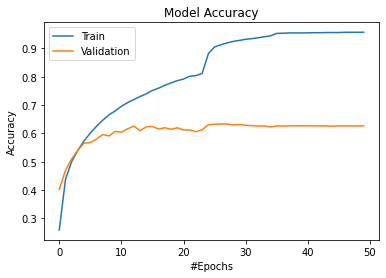

In [32]:
import matplotlib.pyplot as plt

"""

  You have to plot two graphs, one for loss of training and validation data 
  and second one for accuarcy of training and validation data.              
  Set x-axis to number of epochs and y-axis to loss or accuracy. Set legend 
  equal to training and validation set.                                      

"""
#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 

legend = ['Train', 'Validation']
plt.plot(acc_hist)
plt.plot(acc_hist_val)
plt.title('Model Accuracy')
plt.xlabel('#Epochs')
plt.ylabel('Accuracy')
plt.legend(legend, loc='upper left')
plt.show()
#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

In [33]:
from google.colab import files

torch.save(net.state_dict(), 'checkpoint.pth')
# download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
pred_vec = []
correct = 0
net.eval()
with torch.no_grad():
    for data in test_loader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = net(batch)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct / len(test_set)))

Accuracy on the 10000 test images: 62.15 %
